In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Investigate dataset on a small subset

In [2]:
df = pd.read_csv("reviews/reviews.csv", nrows=500000)

In [3]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   recommendationid                500000 non-null  int64  
 1   appid                           500000 non-null  int64  
 2   game                            500000 non-null  object 
 3   author_steamid                  500000 non-null  int64  
 4   author_num_games_owned          500000 non-null  int64  
 5   author_num_reviews              500000 non-null  int64  
 6   author_playtime_forever         500000 non-null  int64  
 7   author_playtime_last_two_weeks  500000 non-null  int64  
 8   author_playtime_at_review       500000 non-null  int64  
 9   author_last_played              500000 non-null  int64  
 10  language                        500000 non-null  object 
 11  review                          499995 non-null  object 


Rename columns

In [4]:
# Ids
COL_RECOMMENDATION_ID = "recommendation_id"
COL_APP_ID = "app_id"
COL_AUTHOR_STEAM_ID = "author_steam_id" 

# Game
COL_GAME_TITLE = "game_title"

# Author
COL_AUTHOR_NUM_GAMES = "author_num_games_owned"
COL_AUTHOR_NUM_REVIEWS = "author_num_reviews"
COL_AUTHOR_PLAYTIME_LIFETIME = "author_playtime_lifetime" # lifetime playtime tracked in game (originaly in minutes, later converted to hours)
COL_AUTHOR_PLAYTIME_LAST_TWO_WEEKS = "author_playtime_last_two_weeks" # playtime tracked in the past two weeks for this game (holds no useful information, will drop)
COL_AUTHOR_PLAYTIME_AT_REVIEW = "playtime_at_review" # playtime when the review was written (originaly in minutes, later converted to hours)
COL_AUTHOR_LAST_PLAYED = "author_last_played"

AUTHOR_COLUMNS = [COL_AUTHOR_NUM_GAMES, COL_AUTHOR_NUM_REVIEWS, COL_AUTHOR_PLAYTIME_LIFETIME, COL_AUTHOR_PLAYTIME_AT_REVIEW, COL_AUTHOR_LAST_PLAYED]

# Review details
COL_LANGUAGE = "language"
COL_REVIEW = "review" # review text
COL_CREATED_AT = "created_at"
COL_UPDATED_AT = "updated_at"
COL_IS_VOTED_UP = "is_voted_up" # if the review was positive or negative

REVIEW_DETAILS_COLUMNS = [COL_LANGUAGE, COL_REVIEW, COL_CREATED_AT, COL_UPDATED_AT, COL_IS_VOTED_UP]

# Players response to the review
COL_NUM_VOTES_UP = "num_votes_up" # number of people who voted the review up
COL_NUM_VOTES_FUNNY = "num_votes_funny" # number of people who voted the review funny
COL_WEIGHTED_VOTE_SCORE = "weighted_vote_score" # a helpfulness score (steam generated)
COL_NUM_COMMENTS = "num_comment" # number of comments to the review

PLAYERS_RESPONSE_COLUMNS = [COL_NUM_VOTES_UP, COL_NUM_VOTES_FUNNY, COL_WEIGHTED_VOTE_SCORE, COL_NUM_COMMENTS]

# Game state at a time of the review
COL_IS_PURCHASED = "is_purchased" # if the user purchased the game on Steam
COL_IS_RECEIVED_FOR_FREE = "is_received_for_free" # true if the user checked a box saying they got the app for free
COL_IS_WRITTEN_DURING_EARLY_ACCESS = "is_written_during_early_access" # if the user posted this review while the game was in Early Access

PURCHASE_STATE_COLUMNS = [COL_IS_PURCHASED, COL_IS_RECEIVED_FOR_FREE, COL_IS_WRITTEN_DURING_EARLY_ACCESS]

# Ching chong
COL_IS_HIDDEN_IN_CHINA = "is_hidden_in_china"
COL_CHINA_LOCATION = "china_location" # ??? no idea; only 1 in 0.5 million rows has a value, will delete

# Create a dictionary for renaming
rename_dict = {
    "recommendationid": COL_RECOMMENDATION_ID,
    "appid": COL_APP_ID,
    "game": COL_GAME_TITLE,
    "author_steamid": COL_AUTHOR_STEAM_ID,
    "author_num_games_owned": COL_AUTHOR_NUM_GAMES,
    "author_num_reviews": COL_AUTHOR_NUM_REVIEWS,
    "author_playtime_forever": COL_AUTHOR_PLAYTIME_LIFETIME,
    "author_playtime_last_two_weeks": COL_AUTHOR_PLAYTIME_LAST_TWO_WEEKS,
    "author_playtime_at_review": COL_AUTHOR_PLAYTIME_AT_REVIEW,
    "author_last_played": COL_AUTHOR_LAST_PLAYED,
    "language": COL_LANGUAGE,
    "review": COL_REVIEW,
    "timestamp_created": COL_CREATED_AT,
    "timestamp_updated": COL_UPDATED_AT,
    "voted_up": COL_IS_VOTED_UP,
    "votes_up": COL_NUM_VOTES_UP,
    "votes_funny": COL_NUM_VOTES_FUNNY,
    "weighted_vote_score": COL_WEIGHTED_VOTE_SCORE,
    "comment_count": COL_NUM_COMMENTS,
    "steam_purchase": COL_IS_PURCHASED,
    "received_for_free": COL_IS_RECEIVED_FOR_FREE,
    "written_during_early_access": COL_IS_WRITTEN_DURING_EARLY_ACCESS,
    "hidden_in_steam_china": COL_IS_HIDDEN_IN_CHINA,
    "steam_china_location": COL_CHINA_LOCATION,
}

df.rename(columns=rename_dict, inplace=True)
print(df.columns)

Index(['recommendation_id', 'app_id', 'game_title', 'author_steam_id',
       'author_num_games_owned', 'author_num_reviews',
       'author_playtime_lifetime', 'author_playtime_last_two_weeks',
       'playtime_at_review', 'author_last_played', 'language', 'review',
       'created_at', 'updated_at', 'is_voted_up', 'num_votes_up',
       'num_votes_funny', 'weighted_vote_score', 'num_comment', 'is_purchased',
       'is_received_for_free', 'is_written_during_early_access',
       'is_hidden_in_china', 'china_location'],
      dtype='object')


Attribute Destruction

In [5]:
df.drop(columns=[COL_IS_HIDDEN_IN_CHINA, COL_CHINA_LOCATION, COL_AUTHOR_PLAYTIME_LAST_TWO_WEEKS], inplace=True)

print("Remaining Columns:")
print(df.columns)

Remaining Columns:
Index(['recommendation_id', 'app_id', 'game_title', 'author_steam_id',
       'author_num_games_owned', 'author_num_reviews',
       'author_playtime_lifetime', 'playtime_at_review', 'author_last_played',
       'language', 'review', 'created_at', 'updated_at', 'is_voted_up',
       'num_votes_up', 'num_votes_funny', 'weighted_vote_score', 'num_comment',
       'is_purchased', 'is_received_for_free',
       'is_written_during_early_access'],
      dtype='object')


Convert minutes to hours and timestamp to a readable date format

In [6]:
playtime_columns = [
    COL_AUTHOR_PLAYTIME_LIFETIME, 
    COL_AUTHOR_PLAYTIME_AT_REVIEW,
]

timestamp_columns = [
    COL_AUTHOR_LAST_PLAYED, 
    COL_UPDATED_AT, 
    COL_CREATED_AT,
]

for col in playtime_columns:
    df[col] = df[col] / 60
    
for col in timestamp_columns:
    df[col] = pd.to_datetime(df[col], unit='s')

print("Converted time columns:")
print(df[playtime_columns].head())

print("Converted date columns:")
print(df[timestamp_columns].head())

Converted time columns:
   author_playtime_lifetime  playtime_at_review
0                  3.283333            3.283333
1                  7.350000            7.350000
2                 24.000000           21.883333
3                 27.266667           26.866667
4                  3.283333            3.283333
Converted date columns:
   author_last_played          updated_at          created_at
0 2023-10-26 16:06:09 2023-10-26 16:06:37 2023-10-26 16:06:37
1 2023-10-26 15:56:49 2023-10-26 15:57:01 2023-10-26 15:57:01
2 2023-10-26 16:43:55 2023-10-26 14:17:42 2023-10-26 14:17:42
3 2023-10-26 17:37:14 2023-10-26 14:12:35 2023-10-26 14:12:35
4 2023-10-26 14:10:01 2023-10-26 14:10:19 2023-10-26 14:10:19


Convert datatypes

In [7]:
# TODO: Convert int64 to less precise types for more efficient memory usage
df[COL_GAME_TITLE] = df[COL_GAME_TITLE].astype('category')

df[COL_IS_PURCHASED] = df[COL_IS_PURCHASED].astype('bool')
df[COL_IS_WRITTEN_DURING_EARLY_ACCESS] = df[COL_IS_WRITTEN_DURING_EARLY_ACCESS].astype('bool')
df[COL_IS_VOTED_UP] = df[COL_IS_VOTED_UP].astype('bool')
df[COL_IS_RECEIVED_FOR_FREE] = df[COL_IS_RECEIVED_FOR_FREE].astype('bool')

print("Updated Data Types:")
df.info()

Updated Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   recommendation_id               500000 non-null  int64         
 1   app_id                          500000 non-null  int64         
 2   game_title                      500000 non-null  category      
 3   author_steam_id                 500000 non-null  int64         
 4   author_num_games_owned          500000 non-null  int64         
 5   author_num_reviews              500000 non-null  int64         
 6   author_playtime_lifetime        500000 non-null  float64       
 7   playtime_at_review              500000 non-null  float64       
 8   author_last_played              500000 non-null  datetime64[ns]
 9   language                        500000 non-null  object        
 10  review                          4999

Clean reviews based on creation date

In [8]:
steam_release_date = pd.to_datetime("2003-09-12")
missing_values_for_last_played = df[COL_AUTHOR_LAST_PLAYED] < steam_release_date

played_the_game_missing_values = df[missing_values_for_last_played & (df[COL_AUTHOR_PLAYTIME_LIFETIME] > 0)]
never_played_the_game = df[missing_values_for_last_played & (df[COL_AUTHOR_PLAYTIME_LIFETIME] <= 0)]

print(f"Number of players who have player the game but last played date is missing: {len(played_the_game_missing_values)}")
print(f"Number of players who have never player the game therefore last played date is missing: {len(never_played_the_game)}")

created_after_updated = df[df[COL_CREATED_AT] > df[COL_UPDATED_AT]]

print(f"Number of reviews that were created after they were updated: {len(created_after_updated)}")

# remove played_the_game_missing_values
df = df[~missing_values_for_last_played | (df[COL_AUTHOR_PLAYTIME_LIFETIME] <= 0)]

# update `COL_AUTHOR_LAST_PLAYED` to NULL for never_played_the_game
df.loc[never_played_the_game.index, COL_AUTHOR_LAST_PLAYED] = pd.NaT

Number of players who have player the game but last played date is missing: 482
Number of players who have never player the game therefore last played date is missing: 10335
Number of reviews that were created after they were updated: 0


There seem to be 5 null reviews, let's display them and see if that data is usefull
Data seems fine, looks like it's just not a textual review

In [9]:
df[df[COL_REVIEW].isnull()]

,recommendation_id,app_id,game_title,author_steam_id,author_num_games_owned,author_num_reviews,author_playtime_lifetime,playtime_at_review,author_last_played,language,...,created_at,updated_at,is_voted_up,num_votes_up,num_votes_funny,weighted_vote_score,num_comment,is_purchased,is_received_for_free,is_written_during_early_access
249440,52855500,1001220,BoneCraft,76561198047016631,0,2,1.583333,1.583333,2019-06-27 12:46:34,english,...,2019-07-01 13:36:53,2019-07-01 13:36:53,True,0,0,0.000000,0,True,False,False
260750,65703224,1002560,Tiny Snow,76561198123633234,113,52,3.600000,3.600000,2020-05-22 15:24:20,english,...,2020-03-24 12:21:11,2020-03-24 12:21:11,True,1,0,0.494506,0,True,False,False
270161,140711349,1003590,Tetris® Effect: Connected,76561199473807807,12,4,49.450000,11.450000,2023-10-29 01:37:15,english,...,2023-06-26 02:20:23,2023-06-26 02:20:23,True,0,0,0.000000,0,True,False,False
349958,115192702,10090,Call of Duty: World at War,76561198354026063,0,2,61.400000,3.600000,2023-10-24 06:58:10,english,...,2022-05-09 06:00:32,2022-05-09 06:00:32,True,0,0,0.000000,0,True,False,False
363700,69299044,10090,Call of Duty: World at War,76561198963727388,0,1,37.700000,36.333333,2022-12-29 09:43:19,english,...,2020-05-17 10:51:44,2020-05-17 10:51:44,True,0,0,0.000000,0,True,False,False


But there also seem to be empty reviews as well, let's fill na reviews as empty strings

In [10]:
empty = df[COL_REVIEW] == ""
empty_one_space = df[COL_REVIEW] == " "
empty_strip = df[COL_REVIEW].str.strip() == ""

print(f"Number of empty reviews: {len(df[empty])}")
print(f"Number of empty reviews with one space: {len(df[empty_one_space])}")
print(f"Number of all empty reviews: {len(df[empty_strip])}")

df[COL_REVIEW] = df[COL_REVIEW].fillna("").str.strip()

Number of empty reviews: 0
Number of empty reviews with one space: 196
Number of all empty reviews: 250


Let's clean Author columns

In [11]:
df[AUTHOR_COLUMNS].describe(include='all')

,author_num_games_owned,author_num_reviews,author_playtime_lifetime,playtime_at_review,author_last_played
count,499518.000000,499518.000000,499518.000000,499518.000000,489183
mean,140.592803,34.168368,418.597916,227.333835,2021-06-27 09:25:32.915456768
min,0.000000,1.000000,0.000000,0.000000,2007-02-03 08:00:00
25%,0.000000,2.000000,4.866667,2.616667,2020-03-04 21:10:23
50%,8.000000,5.000000,22.466667,9.566667,2022-02-22 13:20:39
75%,101.000000,17.000000,182.816667,62.700000,2023-06-08 01:36:28.500000
max,30413.000000,10441.000000,97317.000000,47748.350000,2023-11-03 10:34:55
std,580.270948,235.204610,1313.352135,769.186385,NaN


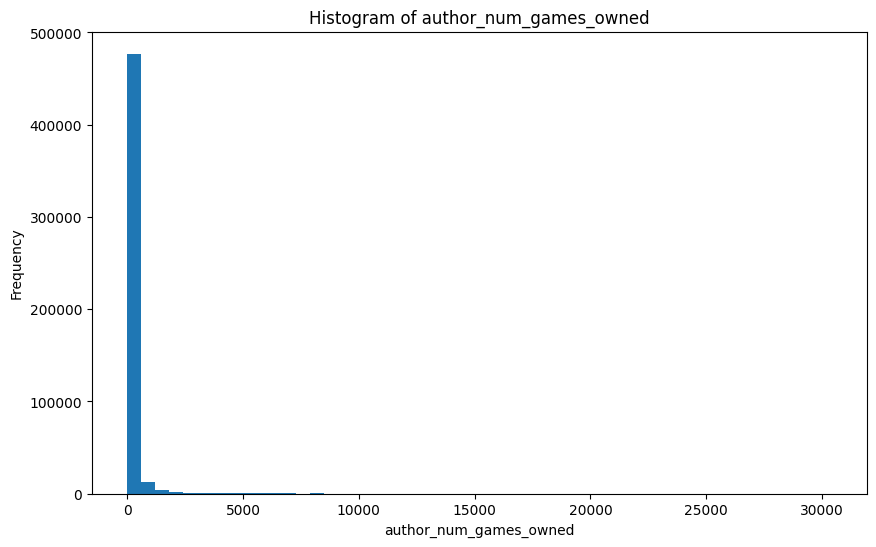

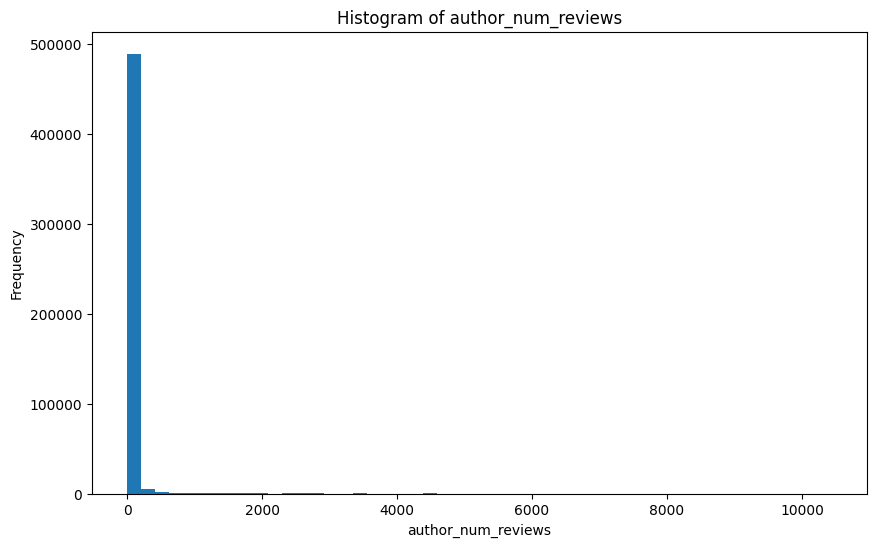

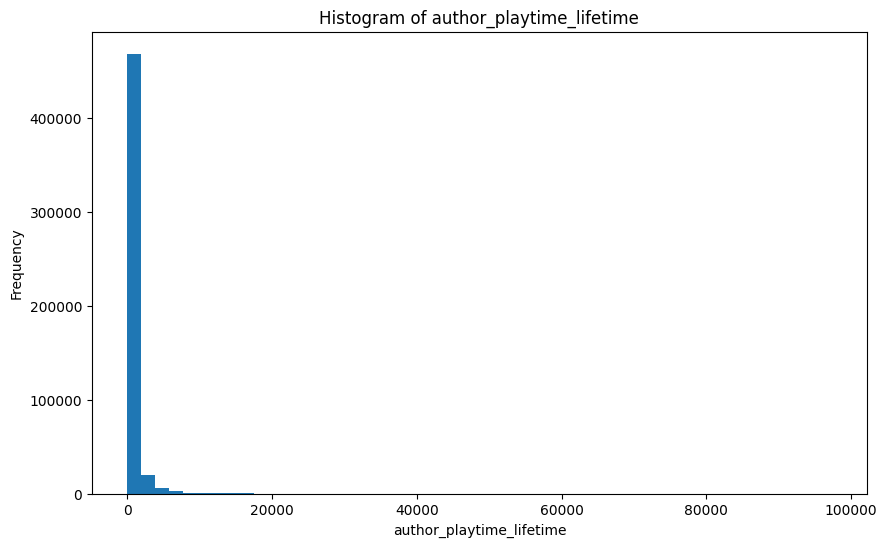

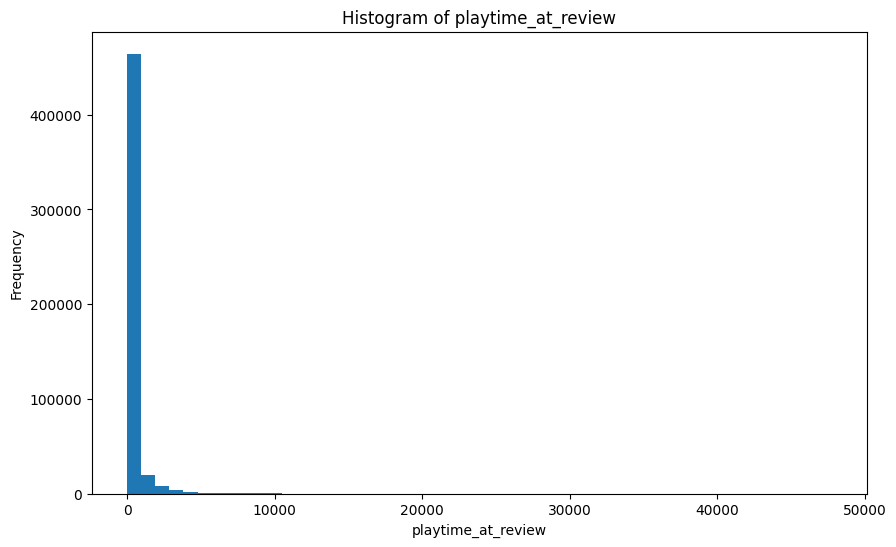

In [12]:
columns_to_plot = [
    COL_AUTHOR_NUM_GAMES, 
    COL_AUTHOR_NUM_REVIEWS, 
    COL_AUTHOR_PLAYTIME_LIFETIME, 
    COL_AUTHOR_PLAYTIME_AT_REVIEW,
]

for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    df[col].plot(kind='hist', bins=50, title=f"Histogram of {col}")
    plt.xlabel(col)
    plt.show()

Helper funcitons for outlier analisys

In [13]:
def find_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    outliers = dataframe[dataframe[column] > upper_bound]
    return outliers, upper_bound

def find_outliers_threshold(dataframe, column, threshold):
    outliers = dataframe[dataframe[column] > threshold]
    return outliers

After further inspection the data samples seem reasonable and fall in possible range but are affected by potential irregularities due to user behaviour, for example people who like to collect games as an achivement have abnormally large number of games or people who leave game opened on the background but don't play it for the sake of decoration of their steam account have large lifetime playtime
I think it's better not to remove those data samples but filter them out during analysis step

In [14]:
def print_outliers(dataframe, column, threshold, should_print_samples=False):
    iqr_samples, upper_bound = find_outliers_iqr(dataframe, column)
    samples = find_outliers_threshold(dataframe, column, threshold)

    print(f"Upper bound: {upper_bound}")
    print(f"Number of total samples: {len(dataframe[column])}")
    print(f"Number of Outliers via IQR: {len(iqr_samples)}")
    print(f"Number of Outliers over the threshold: {len(samples)}")
    
    if should_print_samples:
        print(samples.head())
        
    print("\n")


print_outliers(df, COL_AUTHOR_NUM_GAMES, threshold = 5000, should_print_samples = False)
print_outliers(df, COL_AUTHOR_NUM_REVIEWS, threshold = 2000, should_print_samples = False)
print_outliers(df, COL_AUTHOR_PLAYTIME_LIFETIME, threshold = 15000, should_print_samples = False)
print_outliers(df, COL_AUTHOR_PLAYTIME_AT_REVIEW, threshold = 5000, should_print_samples = False)

Upper bound: 252.5
Number of total samples: 499518
Number of Outliers via IQR: 59103
Number of Outliers over the threshold: 1204


Upper bound: 39.5
Number of total samples: 499518
Number of Outliers via IQR: 62600
Number of Outliers over the threshold: 1164


Upper bound: 449.7416666666666
Number of total samples: 499518
Number of Outliers via IQR: 88626
Number of Outliers over the threshold: 448


Upper bound: 152.825
Number of total samples: 499518
Number of Outliers via IQR: 90729
Number of Outliers over the threshold: 2220




Let's clean Review details columns (Seems fine)

In [15]:
df[REVIEW_DETAILS_COLUMNS].describe(include='all')

,language,review,created_at,updated_at,is_voted_up
count,499518,499518,499518,499518,499518
unique,29,399816,NaN,NaN,2
top,english,.,NaN,NaN,True
freq,183990,3034,NaN,NaN,447880
mean,NaN,NaN,2019-10-30 11:49:53.216770816,2019-12-18 03:05:41.858994176,NaN
min,NaN,NaN,2010-10-17 09:26:08,2010-11-19 18:02:11,NaN
25%,NaN,NaN,2018-04-17 16:27:34,2018-10-22 10:44:05,NaN
50%,NaN,NaN,2020-04-08 12:38:47.500000,2020-05-20 18:24:20.500000,NaN
75%,NaN,NaN,2021-11-24 21:10:30,2021-12-14 18:40:49,NaN
max,NaN,NaN,2023-11-03 08:21:09,2023-11-03 08:21:09,NaN


Let's clean Players response columns (Nearly all reviews are dead/not intresting to the public)

In [16]:
df[PLAYERS_RESPONSE_COLUMNS].describe(include='all')

,num_votes_up,num_votes_funny,weighted_vote_score,num_comment
count,499518.000000,4.995180e+05,499518.000000,499518.000000
mean,2.545890,6.878659e+04,0.199921,0.114939
std,28.797397,1.718804e+07,0.260423,1.284345
min,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000,0.000000
75%,1.000000,0.000000e+00,0.502762,0.000000
max,7796.000000,4.294967e+09,0.992070,293.000000


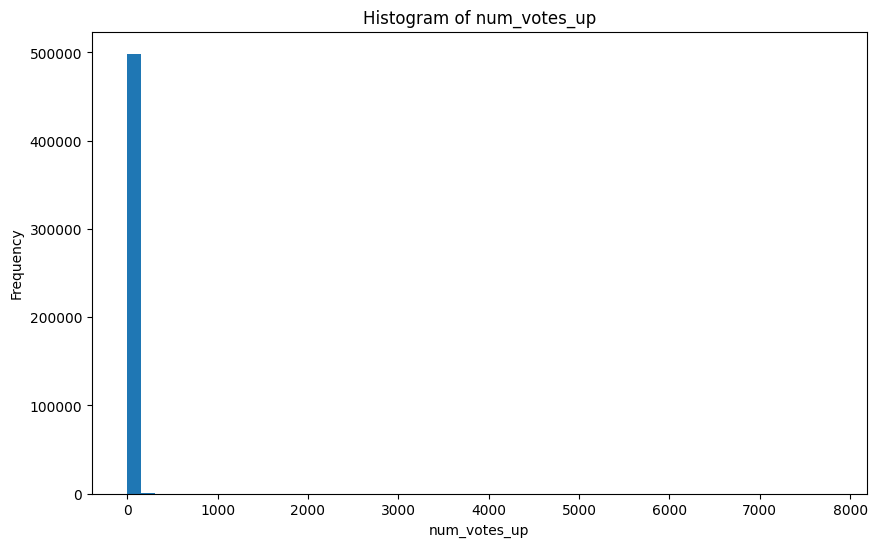

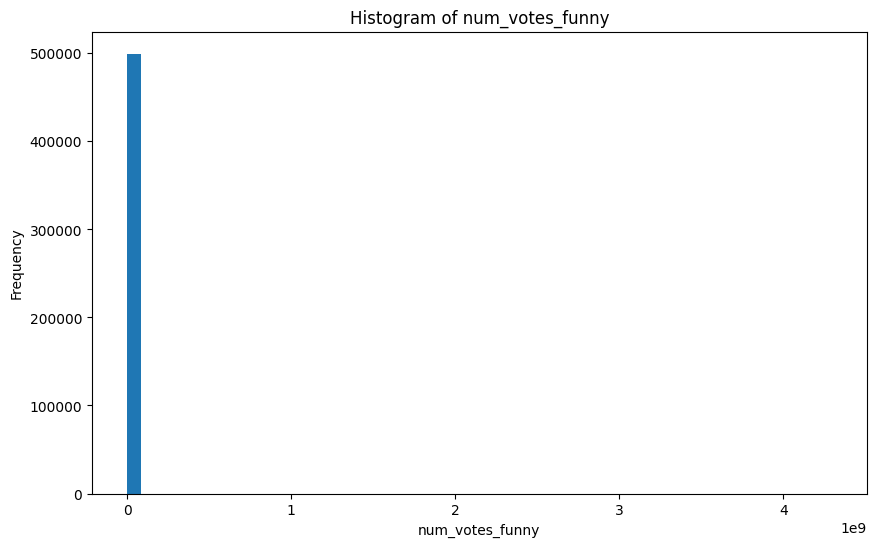

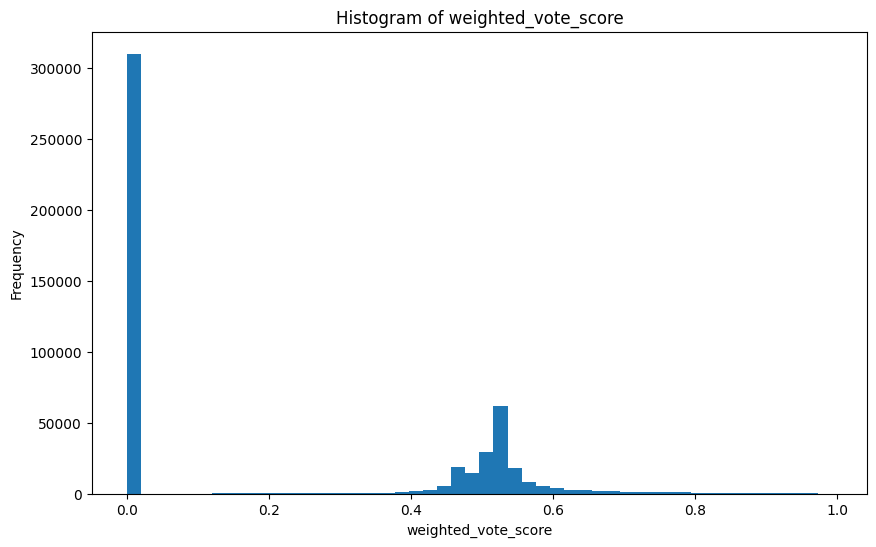

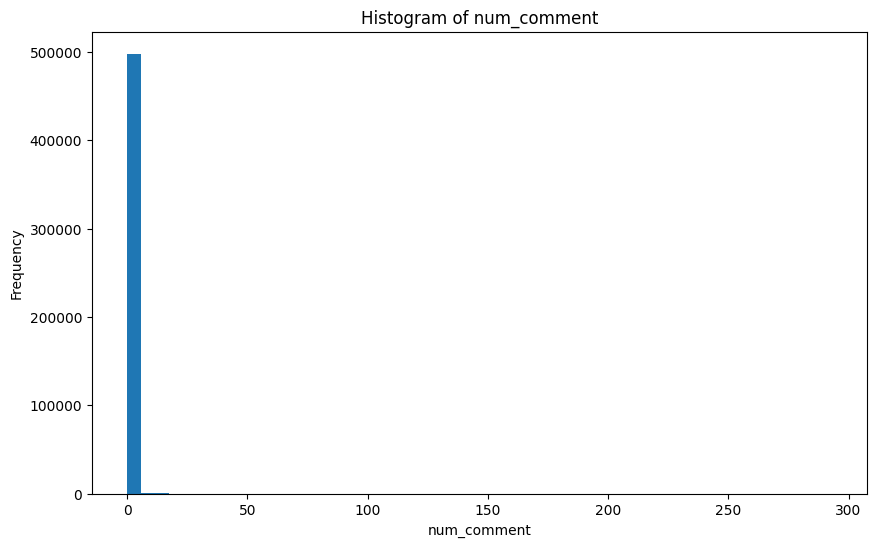

In [17]:
for col in PLAYERS_RESPONSE_COLUMNS:
    plt.figure(figsize=(10, 6))
    df[col].plot(kind='hist', bins=50, title=f"Histogram of {col}")
    plt.xlabel(col)
    plt.show()

There seem to be some reviews that have 2^32 - 1 funny votes (probably went negative when it's definatly a non negative number)

In [22]:
unreasonably_funny_comments = df[COL_NUM_VOTES_FUNNY] > 100000

df[unreasonably_funny_comments]

,recommendation_id,app_id,game_title,author_steam_id,author_num_games_owned,author_num_reviews,author_playtime_lifetime,author_playtime_last_two_weeks,playtime_at_review,author_last_played,...,created_at,updated_at,is_voted_up,num_votes_up,num_votes_funny,weighted_vote_score,num_comment,is_purchased,is_received_for_free,is_written_during_early_access
57280,85194029,10,Counter-Strike,76561198414261565,33,6,13.450000,0.0,8.566667,2023-09-23 08:53:06,...,2021-01-23 09:49:56,2021-01-23 09:49:56,True,1,4294967295,0.523810,0,True,False,False
141296,32481407,10,Counter-Strike,76561198343061608,50,3,13.033333,0.0,0.666667,2020-04-24 19:15:00,...,2017-06-16 18:08:18,2017-06-16 18:08:18,True,2,4294967295,0.504951,1,True,False,False
143132,31554134,10,Counter-Strike,76561198068425543,4,3,6748.850000,29.7,3769.950000,2023-10-25 04:11:05,...,2017-05-05 06:57:27,2017-05-05 06:57:27,True,1,4294967293,0.502488,0,False,False,False
147264,30045118,10,Counter-Strike,76561197977644592,0,1,444.116667,0.0,7.333333,2017-11-18 17:42:26,...,2017-02-19 21:34:24,2017-02-19 21:34:24,True,1,4294967295,0.502488,0,True,True,False
151877,28503177,10,Counter-Strike,76561198050399275,0,5,2112.050000,0.0,88.016667,2023-10-01 08:16:16,...,2016-12-21 08:38:49,2019-11-28 17:42:53,True,3,4294967295,0.506173,0,True,False,False
158140,26912494,10,Counter-Strike,76561198248428592,0,2,2223.183333,0.0,1367.783333,2017-05-10 20:05:50,...,2016-11-23 22:05:43,2016-11-23 22:05:43,True,1,4294967295,0.502488,0,True,True,False
177698,18709783,10,Counter-Strike,76561198206777747,522,7,72.066667,0.0,37.450000,2022-02-17 15:35:00,...,2015-10-27 11:52:50,2017-03-17 20:00:29,True,4,4294967295,0.580346,0,False,False,False
187906,14805170,10,Counter-Strike,76561198181246623,0,1,124.083333,0.0,0.233333,2017-01-01 12:17:58,...,2015-03-09 07:17:44,2015-03-09 07:17:44,True,1,4294967294,0.500000,0,True,False,False


Lets remove them after an arbitrary threshold

In [18]:
df = df[df[COL_NUM_VOTES_FUNNY] <= 100000]

Now it's fine

In [19]:
df[PLAYERS_RESPONSE_COLUMNS].describe(include='all')

,num_votes_up,num_votes_funny,weighted_vote_score,num_comment
count,499510.000000,499510.000000,499510.000000,499510.000000
mean,2.545903,0.804430,0.199916,0.114939
std,28.797627,14.254359,0.260422,1.284355
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.502762,0.000000
max,7796.000000,4130.000000,0.992070,293.000000


Let's clean Purchase state columns (seems fine)

In [20]:
df[PURCHASE_STATE_COLUMNS].describe(include='all')

,is_purchased,is_received_for_free,is_written_during_early_access
count,499510,499510,499510
unique,2,2,2
top,True,False,False
freq,349221,477351,471811


Attribute Construction

In [21]:
COL_REVIEWS_PER_GAME = "reviews_per_game" # number of reviews player has written per game they own (supposed to show normilized user activity)
COL_REVIEW_TOTAL_ENGAGEMENT = "review_total_engagement" # number of all votes up and funny (sadly votes down are not collected)
COL_REVIEW_COMMENT_PER_ENGAGEMENT_VOTE = "review_comment_per_vote" # number of comments per vote (supposed to show normilized review comment engagement)

df[COL_REVIEWS_PER_GAME] = np.where(
    df[COL_AUTHOR_NUM_GAMES] > 0, 
    df[COL_AUTHOR_NUM_REVIEWS] / df[COL_AUTHOR_NUM_GAMES], 
    0
)

df[COL_REVIEW_TOTAL_ENGAGEMENT] = df[COL_NUM_VOTES_UP] + df[COL_NUM_VOTES_FUNNY]

df[COL_REVIEW_COMMENT_PER_ENGAGEMENT_VOTE] = np.where(
    df[COL_REVIEW_TOTAL_ENGAGEMENT] > 0, 
    df[COL_NUM_COMMENTS] / df[COL_REVIEW_TOTAL_ENGAGEMENT], 
    0
)

print("Updated DataFrame Info:")
print(df.info())

print("\nSample of New Features:")
print(df[[COL_REVIEWS_PER_GAME, COL_REVIEW_TOTAL_ENGAGEMENT, COL_REVIEW_COMMENT_PER_ENGAGEMENT_VOTE]].head())

Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 499510 entries, 0 to 499999
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   recommendation_id               499510 non-null  int64         
 1   app_id                          499510 non-null  int64         
 2   game_title                      499510 non-null  category      
 3   author_steam_id                 499510 non-null  int64         
 4   author_num_games_owned          499510 non-null  int64         
 5   author_num_reviews              499510 non-null  int64         
 6   author_playtime_lifetime        499510 non-null  float64       
 7   playtime_at_review              499510 non-null  float64       
 8   author_last_played              489175 non-null  datetime64[ns]
 9   language                        499510 non-null  object        
 10  review                          49951